In [ ]:
# LSTM for sequence classification in the IMDB dataset
import numpy
import sys
sys.path.append('datasets')

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.datasets import imdb
import codeforces
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
max_len = 500
embed_dim = 32
lstm_size = 100
batch_size = 64
epochs = 20

print('load data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words, maxlen = max_len)
# truncate and pad input sequences

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
# create the model

model = Sequential()
model.add(Embedding(top_words+3, embed_dim, input_length=max_len))
model.add(LSTM(lstm_size))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Using TensorFlow backend.


load data...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160096    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,397.0
Trainable params: 213,397
Non-trainable params: 0.0
_________________________________________________________________
None
Train on 25000 samples, validate on 20947 samples
Epoch 1/20
25000/25000 [==============================] - 1333s - loss: 0.4409 - acc: 0.7837 - val_loss: 0.3337 - val_acc: 0.8623
Epoch 2/20
25000/25000 [==============================] - 1216s - loss: 0.2729 - acc: 0.8932 - val_loss: 0.3300 - val_acc: 0.8601
Epoch 3/20
24576/25000 [============================>.] - ETA: 15s -

In [3]:
#评估模型好坏
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)
#accuracy = (TP + TN) / (TP + FP + TN + FN)
#F1 Score = 2*P*R/(P+R)，其中P和R分别为 precision 和 recall
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
y_preds = np.round(model.predict(X_test))
result = precision_recall_fscore_support(y_test, y_preds, average='binary')
print(result)


(0.88641499958148484, 0.84719999999999995, 0.86636397103939122, None)


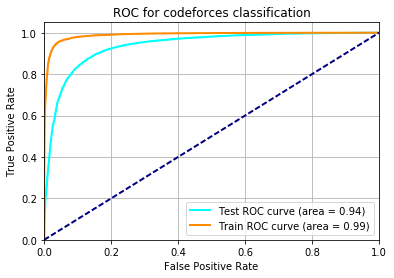

In [5]:
#ROC曲线和AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr={}
tpr={}
roc_auc={}

y_score1 = model.predict(X_test)
y_score2 = model.predict(X_train)

fpr['test'], tpr['test'], _ = roc_curve(y_test, y_score1)
roc_auc['test'] = auc(fpr['test'], tpr['test'])
fpr['train'], tpr['train'], _ = roc_curve(y_train, y_score2)
roc_auc['train'] = auc(fpr['train'], tpr['train'])
    
plt.figure()
lw = 2
plt.plot(fpr['test'], tpr['test'], color='aqua',
         lw=lw, label='Test ROC curve (area = %0.2f)' % roc_auc['test'])
plt.plot(fpr['train'], tpr['train'], color='darkorange',
         lw=lw, label='Train ROC curve (area = %0.2f)' % roc_auc['train'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for codeforces classification')
plt.legend(loc="lower right")
plt.grid()
plt.show()